># Analyse Spatio-Temporelle Conjointe

>## Variance expliquée par l'espace et par le temps
>### Pourquoi compare t-on la variance par l'espace et la variance par le temps ?
L'analyse spatio-temporelle d'un champ de température de surface sert d'abord à déterminer si la variabilité qu'on observe est majoritairement due à des contrastes spatiaux persistants ou à des fluctuations temporelles globales.
>### Comment calculer la variance par l'espace ?
On calcule d'abord pour chaque point la moyenne temporelle :
$$
\overline{SST}(x,y) = \frac{1}{T}\sum_{t=1}^{T}SST(x,y,t)
$$
Cette moyenne une fois représenté sur une carte permet de voir l'évolution "moyenne" du domaine (variabilité interannuelle, oscillations, éventuelle tendance).
Puis on calcule ensuite l'amplitude des constrastes spatiaux grâce à la variance spatiale de la carte :
$$
\mathrm{Var}_{espace}=\mathrm{Var}_{x,y}\overline{\mathrm{SST}}(x,y)
$$

>### Comment calculer la variance par le temps ?
On calcule la moyenne spatiale sur notre domaine à chaque instant t :
$$
\overline{SST}(t)=\frac{1}{N}\sum_{x,y}SST(x,y,t)
$$
Cette série temporelle représente l'évolution moyenne. Puis on mesure la variabilité temporelle globale avec la formule :
$$
Var_{temps}=Var_{t}\overline{SST(t)}
$$
>### Comment interpréter notre comparaison ?
On peut introduire un ratio R tel que :
$$
R = \frac{Var_{espace}}{Var_{temps}}
$$
Ainsi :
- Si on obtient R >> 1 alors notre variabilité sera principalement causée par l'espace, donc les différences géographiques dominent les fluctuations temporelles globales
- Si on obtient R << 1 alors la variabilité sera causée par le temps signifiant que le domaine évolue de manière homogène avec un signal temporel fort
- Si on obtient R = 1 les deux seront comparables ce qui justifiera d'analyser à la fois les structures spatiales et la dynamique temporelle.

In [ ]:
import numpy as np 
import xarray as xr 
import matplotlib as plt 

datasetBrut = xr.open_dataset("../../data/processed/sstCOPERNICUS20102019Processed.nc")
sstBrut = datasetBrut["analysed_sst"]

datasetDesaisonnalise = xr.open_dataset("../../data/processed/sstDeseasonalizedCOPERNICUS20102019.nc")
sstDesaisonnalise = datasetDesaisonnalise["analysed_sst"]

## For the Processed data :
# Temporal average and then Spatial variability
sstMeanTimeP = sstBrut.mean(dim="time")
varSpaceP = sstMeanTimeP.var(dim=("latitude","longitude"))

# Spatial average and then Temporal variability
sstMeanSpaceP = sstBrut.mean(dim=("latitude","longitude"))
varTimeP = sstMeanSpaceP.var(dim="time")

# Ratio
R1 = varSpaceP / varTimeP

# --- Showing our results --- 
print("La variance spatiale (brute) est : ",float(varSpaceP.values))
print("La variance temporelle (brute) est : ", float(varTimeP.values))
print("R1 = ", R1.values)



# Temporal average and then Spatial variability
sstMeanTime = sstDesaisonnalise.mean(dim="time")
varSpace = sstMeanTime.var(dim=("latitude","longitude"))

# Spatial average and then Temporal variability
sstMeanSpace = sstDesaisonnalise.mean(dim=("latitude","longitude"))
varTime = sstMeanSpace.var(dim="time")

# Ratio
R2 = varSpace / varTime

# --- Showing our results ---
print("La variance spatiale est : ",float(varSpace.values))
print("La variance temporelle est : ", float(varTime.values))
print("R2 = ", float(R2.values))

La variance spatiale (brute) est :  0.048274967819452286
La variance temporelle (brute) est :  10.05994987487793
R1 =  0.0047987285
La variance spatiale est :  2.145392153860004e-12
La variance temporelle est :  0.6674704551696777
R2 =  3.214212966964891e-12


>### Comment interpréter nos résultats ?
Lorsqu'on utilise notre jeu de données brute, la variance par le temps de la moyenne spatiale est largement supérieure à la variance spatiale de la moyenne temporelle ce qui signfie que les fluctuations temporelles sont plus importantes que les fluctuations spatiales à l'échelle globale notamment le cycle saisonnier. A l'inverse lorsqu'on utilise les données désaisonnalisées la variance spatiale devient presque totalement nulle ce qui confirme que les anomalies ne sont plus impactées par la structure spatiale mais par la dynamique temporelle.


>## Covariance Spatiale
>### Pourquoi réalise t-on la covariance spatiale ?
Dans la partie précédente nous avons prouvés que la variance spatiale moyenne est faible cependant cela ne signifie pas que notre espace n'est pas structuré. On cherche donc à répondre à la question :
Est-ce que des points proches ont tendance à fluctuer ensemble dans le temps ?
Ce qui est exactement le but de la covariance spatiale.
>### Comment calcule t-on la covariance ?
On part des données désaisonnalisées puisqu'on s'intéresse à la dynamique du système puis on utilise la formule suivante :
$$
Cov_{ij}=\langle SST_{i}(t)SST_{j}(t) \rangle
$$
De plus puisque nos anomalies sont centrées nous n'avons pas besoin de retirer la moyenne (nulle) et ainsi la covariance mesure directement la covariabilité.
>### Pourquoi choisit on un point de référence ?
Pour éviter de calculer la covariance entre tous les couples de points on choisit un point de référence et on regarde comment il est corrélé par rapport au reste de notre domaine. Ici on choisit arbitrairement le point de coordonnées (49.5, -3.0) puisqu'on sait qu'il se situe en pleine mer.

<xarray.DataArray 'analysed_sst' (time: 3652)> Size: 15kB
array([ 0.241512,  0.221523,  0.341518, ..., -1.05774 , -1.037751, -0.937745],
      shape=(3652,), dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
    latitude   float32 4B 49.48
    longitude  float32 4B -2.975
    month      (time) int64 29kB ...
Attributes:
    units:          degC
    standard_name:  sea_surface_temperature
    long_name:      Analysed sea and under-ice surface temperature
    comment:        The under-ice SST is the freezing point temperature TS, c...
    source:         AASTI v2 SST/IST, ESA CCI SST and C3S SST L2P products
    valid_range:    [-6000  4500]
std_ref = 0.8550573587417603
cov_map min/max = 0.3637390434741974 0.8278836607933044


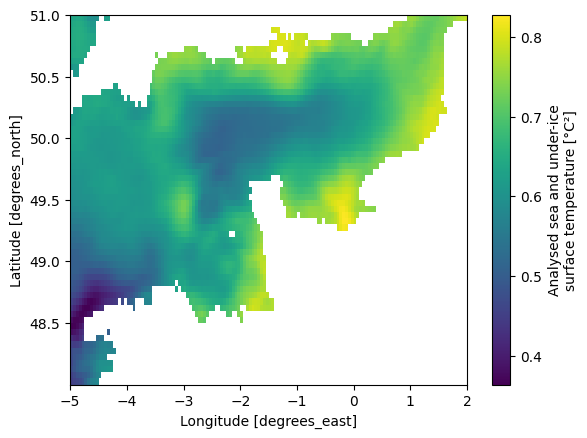

In [ ]:
# Choosing a reference point in high sea
lat0 = 49.5
lon0 = -3.0

# Calculating the covariance Map
sstReference = sstDesaisonnalise.sel(latitude=lat0, longitude=lon0, method="nearest")
print(sstReference)
covMap = (sstDesaisonnalise * sstReference).mean(dim="time")
covMap.attrs["units"] = "°C²"

# --- Showing our results ---
covMap.plot()

print("sttReference =", float(sstReference.std("time")))
print("covMap min/max =", float(covMap.min()), float(covMap.max()))



>### Comment interpréter nos résultats ?
On observe une covariance spatiale positive partout et varie peu, elle ressemble aussi à la carte d'écart-type que nous avions obtenus et de plus lorsqu'on calcule le maximum et le minimum on obtient des grandeurs cohérentes (0.3 à 0.8)
Ainsi il n'y a pas d'artefact numérique, de bruit ou de NaN.
De plus grâce à notre covariance spatiale on sait maintenant que les points ont tendance à varier en même temps puisque quand notre point est positif ou négatif la majorité des points le sont également, il y a très peu de zones qui sont fortement opposées.
Pour conclure, les différences spatiales observées ne viennent pas de la phase du signal mais de l'amplitude locale des fluctuations.

>## Corrélation temporelle par point spatial
>### Pourquoi réalise t-on une corrélation temporelle par point spatial ?
On a remarqué dans la partie précédente que nos pixels ont tendance à varier en même temps, on cherche maintenant à répondre à la question : Pour chaque pixel est-ce que le signal se ressemble d'un moment donné à l'autre ?
>### Comment réaliser une corrélation temporelle par point spatial ?
On utilise la méthode de l'autocorrélation à un décalage c'est à dire qu'on utilise la valeur précédente ou suivante d'un temps donné pour calculer la valeur actuelle. Ici on calcula la corrélation entre  $ SST(t) $ et $ SST(t + \tau ) $. On utilise la formule :
$$
\rho_{\tau}(x,y)=Corr(SST(x,y,t)), SST(x,y,t+\tau)
$$
- si $\rho_{\tau} ≈ 1 $ alors l'autocorrélation est très persistant
- si $\rho_{\tau} ≈ 0 $ alors l'autocorrélation est peu persistante
- si $\rho_{\tau} < 0 $ alors l'autocorrélation oscille
>### Quel lag choisir ?
Puisqu'ici on utilise des données journalières (3652 jours) on pourra faire des test avec plusieurs lags :
- 1 jours pour quotidien
- 7 jours pour hebdomadaire
- 30 jours pour mensuel

c:\Users\gaoks\Isen\ProjetM1\m1Project_SciML\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1992: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\gaoks\Isen\ProjetM1\m1Project_SciML\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1992: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


0.3916468918323517 0.7333785891532898


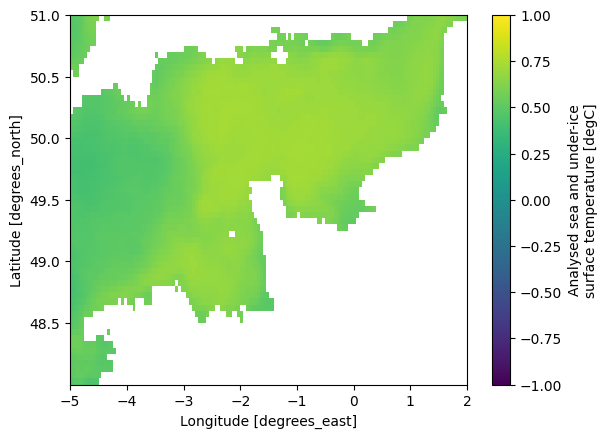

In [ ]:
# Choosing a lag
lag = 30

# Creating the gap size difference
x = sstDesaisonnalise
y = sstDesaisonnalise.shift(time=lag)

# Autocorrelation of lag 
lagCorr = xr.corr(x, y, dim="time")
lagCorr.plot(vmin=-1, vmax=1)

# --- Showing our results ---
print(
    float(lagCorr.min(skipna=True)),
    float(lagCorr.max(skipna=True))
)



>### Comment interpréter nos résultats ?
Pour le lag 1 jour on obtient un min/max de 0.876 à 0.931 ce qui signifie une persistance très forte à court terme
Pour le lag 7 jour on obtient un min/max de 0.301 à 0.620 ce qui montre une chute  de la mémoire à l'échelle hebdomadaire avec quelques différences spatiales visibles
Pour le lag 30 on calcule le min/max de 0.392 à 0.733.
Pour conclure à court terme la corrélation est très élevée et lorsque notre décalage temporel augmente la corrélation diminue progressivement et devient de plus en plus spatialement contrastée. Ceci met en évidence une mémoire temporelle qui varie en fonction de l'espace certaines zones auront une évolution plus rapides que d'autres ce qui confirme que la dynamique temporelle à l'échelle locale n'est pas homogène dans tout le domaine.